# House Prices: Advanced Regression Techniques

## 1° Limpeza dos dados

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
train = pd.read_csv('train.csv')
print("Linhas: %d, Colunas: %d" % (len(train), len(train.columns)))
train.head()

Linhas: 1460, Colunas: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('test.csv')
print("Linhas: %d, Colunas: %d" % (len(test), len(test.columns)))
test.head()

Linhas: 1459, Colunas: 80


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
banco = pd.DataFrame()
banco = pd.concat([train,test],sort=False)

### Selecionando counas necessárias

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
recursos = ['Id','BedroomAbvGr','TotRmsAbvGrd', '1stFlrSF',
       '2ndFlrSF','YearBuilt', 'YearRemodAdd','MSSubClass', 'LotArea']
recursos2 =['Id','BedroomAbvGr','TotRmsAbvGrd', '1stFlrSF',
       '2ndFlrSF','YearBuilt', 'YearRemodAdd','MSSubClass', 'LotArea','SalePrice']

In [7]:
train = train[recursos2]
test = test[recursos]
banco = banco[recursos]

### Palavras em Números

In [8]:
train.dtypes

Id              int64
BedroomAbvGr    int64
TotRmsAbvGrd    int64
1stFlrSF        int64
2ndFlrSF        int64
YearBuilt       int64
YearRemodAdd    int64
MSSubClass      int64
LotArea         int64
SalePrice       int64
dtype: object

In [9]:
new_train = pd.get_dummies(train)
new_test = pd.get_dummies(test)



### Valores nulos

In [10]:
new_train.isnull().sum().sort_values(ascending=False).head()

SalePrice       0
LotArea         0
MSSubClass      0
YearRemodAdd    0
YearBuilt       0
dtype: int64

In [11]:
new_test.isnull().sum().sort_values(ascending=False).head()

LotArea         0
MSSubClass      0
YearRemodAdd    0
YearBuilt       0
2ndFlrSF        0
dtype: int64

### Matriz de Correlação

In [12]:
banco.shape

(2919, 9)

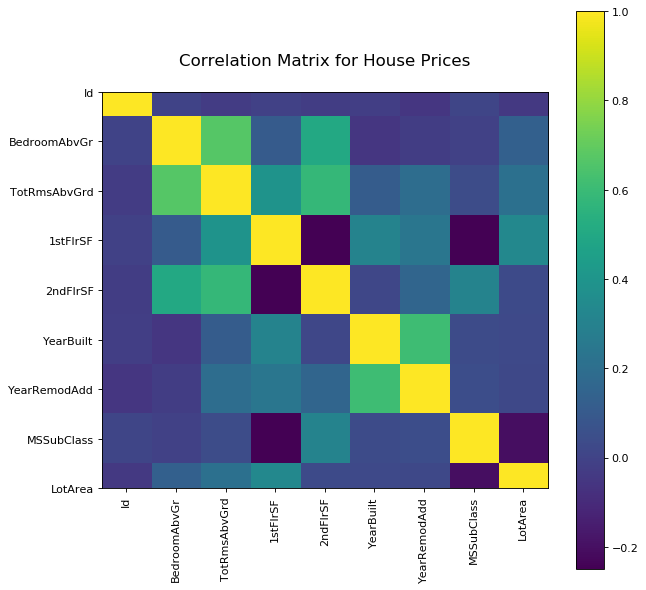

In [13]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'House Prices'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(banco,9)

## 2° Construindo o modelo

In [14]:
X = new_train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

modelo = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
modelo.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

### Importância dos recursos

In [15]:
features_importance = zip(modelo.feature_importances_,recursos)
for importancia,recurso in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (recurso, importancia*100))

YearBuilt: 31.714889%
1stFlrSF: 23.011888%
2ndFlrSF: 11.661097%
LotArea: 10.697174%
YearRemodAdd: 9.782903%
TotRmsAbvGrd: 6.180718%
MSSubClass: 3.207008%
Id: 1.886045%
BedroomAbvGr: 1.858278%


In [16]:
## Verificando o nível de precisão

print(modelo.score(X,y))

0.9654688689959411


In [17]:
# Validando modelo usando Cross Validation
modelo_val = cross_val_score(modelo, X, y, cv=5)
print(modelo_val.mean())

0.7919655884649289
